In [9]:
# 📘 Notebook 02: One-Ports Algebraicos – Fundamentos prácticos de WDF

# 🧠 Objetivo del notebook
# Comprender los componentes básicos de un solo puerto (one-port) con comportamiento algebraico:
# Resistor, Fuente de voltaje ideal, Fuente resistiva, Cortocircuito, Circuito abierto, Interruptor

# Basado en §1.2 de la tesis de Kurt Werner

# -------------------------------------------------------------
# 📘 SECCIÓN 1 – Resistor
# -------------------------------------------------------------

"""
Un resistor ideal de valor R tiene una relación lineal entre v e i:
    v = R * i

En variables de onda:
    b = 0   (si R = R_puerto)

Es decir: **onda reflejada es cero** si está perfectamente adaptado.
Esto es el caso más simple y fundamental de WDF.
"""

from pywdf.core.wdf import Resistor

# Crear un resistor de 1kΩ
R = Resistor(1000)

# Ver su resistencia de puerto y ganancia
print("Resistencia de puerto:", R.Rp)
print("Conductancia:", R.G)

# En este caso, b siempre es 0 (adaptado perfectamente)
a = 1.0
R.accept_incident_wave(a)
b = R.propagate_reflected_wave()
print(f"Onda incidente a = {a}, Onda reflejada b = {b}")

Resistencia de puerto: 1000
Conductancia: 0.001
Onda incidente a = 1.0, Onda reflejada b = 0


In [4]:
# -------------------------------------------------------------
# 📘 SECCIÓN 2 – Cortocircuito (ShortCircuit)
# -------------------------------------------------------------

"""
Un cortocircuito ideal es un componente con v = 0 para cualquier corriente.
En WDF:
    b = -a

Toda la energía incidente se refleja con cambio de signo.
"""

from pywdf.core.wdf import ShortCircuit

S = ShortCircuit()
a = 1.0
S.accept_incident_wave(a)
b = S.propagate_reflected_wave()
print(f"ShortCircuit – a = {a}, b = {b} (esperado -1.0)")


ShortCircuit – a = 1.0, b = -1.0 (esperado -1.0)


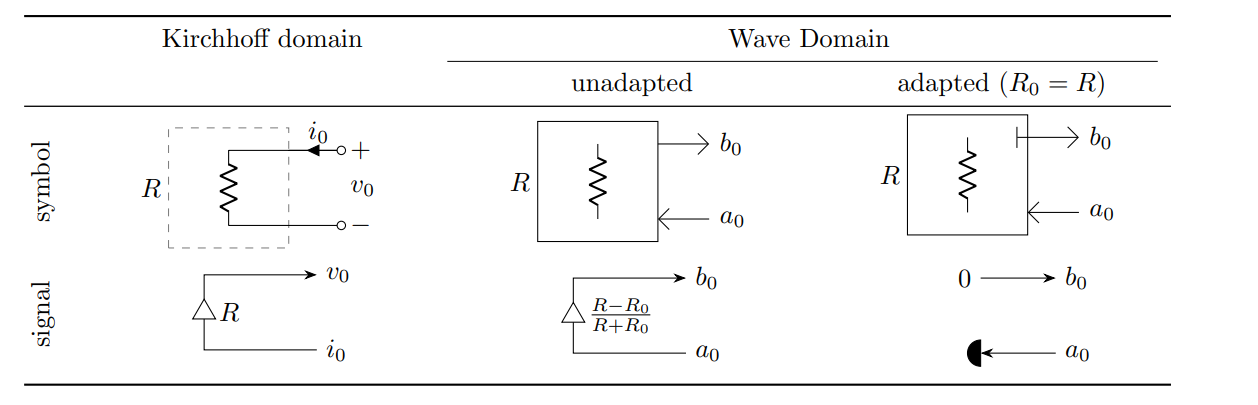

In [5]:
# -------------------------------------------------------------
# 📘 SECCIÓN 3 – Circuito abierto (OpenCircuit)
# -------------------------------------------------------------

"""
Un circuito abierto ideal implica i = 0 para cualquier voltaje.
En WDF:
    b = +a

La onda se refleja sin cambio de signo.
"""

from pywdf.core.wdf import OpenCircuit

O = OpenCircuit()
a = 1.0
O.accept_incident_wave(a)
b = O.propagate_reflected_wave()
print(f"OpenCircuit – a = {a}, b = {b} (esperado +1.0)")

OpenCircuit – a = 1.0, b = 1.0 (esperado +1.0)


In [6]:
# -------------------------------------------------------------
# 📘 SECCIÓN 4 – Fuente de voltaje ideal
# -------------------------------------------------------------

"""
Una fuente ideal tiene voltaje constante Vs independientemente de la corriente.
La onda reflejada es:
    b = -a + 2 * Vs

"""

from pywdf.core.wdf import IdealVoltageSource

Vs_val = 1.5

source = IdealVoltageSource(Resistor(1000))
source.set_voltage(Vs_val)
a = 0.5
source.accept_incident_wave(a)
b = source.propagate_reflected_wave()
print(f"IdealVoltageSource – Vs = {Vs_val}, a = {a}, b = {b} (esperado {2*Vs_val - a})")

IdealVoltageSource – Vs = 1.5, a = 0.5, b = 2.5 (esperado 2.5)


In [7]:
# -------------------------------------------------------------
# 📘 SECCIÓN 5 – Fuente de voltaje resistiva
# -------------------------------------------------------------

"""
Una fuente de voltaje realista incluye una resistencia en serie.
En WDF se implementa como `ResistiveVoltageSource`.
Aquí la onda reflejada es simplemente el valor de Vs.
"""

from pywdf.core.wdf import ResistiveVoltageSource

real_source = ResistiveVoltageSource(1000)
real_source.set_voltage(1.0)
b = real_source.propagate_reflected_wave()
print(f"ResistiveVoltageSource – b = {b} (esperado 1.0)")

ResistiveVoltageSource – b = 1.0 (esperado 1.0)


In [8]:
# -------------------------------------------------------------
# 📘 SECCIÓN 6 – Interruptor ideal (Switch)
# -------------------------------------------------------------

"""
El interruptor alterna entre comportamiento de circuito abierto y cortocircuito:
- Si cerrado: b = -a
- Si abierto: b = +a

Esto permite modelar comportamientos no lineales o tiempo variante.
"""

from pywdf.core.wdf import Switch, Resistor

dummy = Resistor(1000)
sw = Switch(dummy)

sw.set_closed(True)
a = 1.0
sw.accept_incident_wave(a)
b = sw.propagate_reflected_wave()
print(f"Switch cerrado – a = {a}, b = {b} (esperado -1.0)")

sw.set_closed(False)
sw.accept_incident_wave(a)
b = sw.propagate_reflected_wave()
print(f"Switch abierto – a = {a}, b = {b} (esperado +1.0)")

# -------------------------------------------------------------
# 🧩 Próxima sección: componentes reactivos – Capacitor e Inductor
# Esto será tratado en el Notebook 03: OnePorts_Reactivos.ipynb
# Basado en §1.3 de la tesis de Kurt Werner


Switch cerrado – a = 1.0, b = -1.0 (esperado -1.0)
Switch abierto – a = 1.0, b = 1.0 (esperado +1.0)
